In [1]:
#Exercise on https://milliams.com/courses/applied_data_analysis/Validation.html
from sklearn.datasets import load_diabetes
from sklearn.linear_model import LinearRegression

X, y = load_diabetes(as_frame=True, return_X_y=True)

X.head()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019907,-0.017646
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068332,-0.092204
2,0.085299,0.050680,0.044451,-0.005670,-0.045599,-0.034194,-0.032356,-0.002592,0.002861,-0.025930
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022688,-0.009362
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031988,-0.046641


In [2]:
from sklearn.model_selection import train_test_split

train_X, test_X, train_y, test_y = train_test_split(X, y, random_state=42)

model = LinearRegression(fit_intercept=True)
model.fit(train_X[["bmi"]], train_y)

LinearRegression()

In [3]:
model.score(test_X[["bmi"]], test_y)

0.3172099449537781

In [4]:
import pandas as pd

pred = pd.DataFrame({"bmi": [X["bmi"].min(), X["bmi"].max()]})
pred["y"] = model.predict(pred)

<Axes: xlabel='bmi', ylabel='target'>

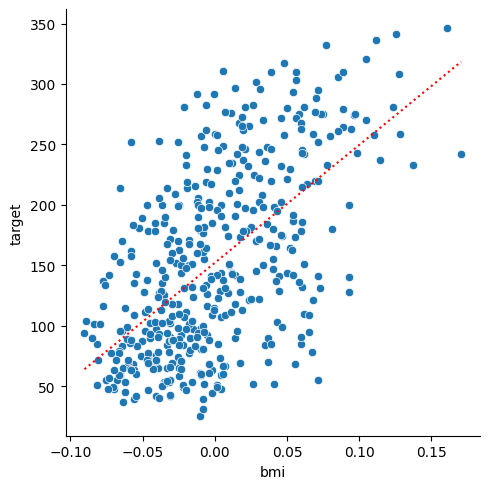

In [5]:
import seaborn as sns

sns.relplot(data=X, x="bmi", y=y)
sns.lineplot(data=pred, x="bmi", y="y", c="red", linestyle=":")